In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import metrics
from scipy import stats
import seaborn as sns

In [94]:
pd.pandas.set_option('display.max_columns',None)

In [95]:
fake_data=pd.read_csv("Fake.csv")
true_data=pd.read_csv("True.csv")
train_data=pd.read_csv("Train.csv")

In [96]:
fake_data.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [97]:
true_data.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [98]:
train_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [99]:
fake_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [100]:
true_data.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [101]:
train_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [102]:
fake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [103]:
true_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB


In [104]:
train_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [105]:
# add a target class column to indicate whether the news is real or fake
fake_data['label'] = 1
fake_data.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1


In [106]:
# add a target class column to indicate whether the news is real or fake
true_data['label'] = 0
true_data.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [107]:
train_data.drop(columns = ['author','id'], inplace = True)
train_data.head()

,title,text,label
0,House Dem Aide: We Didn’t Even See Comey’s Let...,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Print \nAn Iranian woman has been sentenced to...,1


In [108]:
# Concatenate Real and Fake News
data = pd.concat([true_data, fake_data, train_data]).reset_index(drop = True)
data

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
65693,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,NaN,NaN,0
65694,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,NaN,NaN,0
65695,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,NaN,NaN,0
65696,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",NaN,NaN,1


In [109]:
# drop unnecessary  columns 
data.drop(columns = ['date','subject'], inplace = True)
data

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0
...,...,...,...
65693,Rapper T.I.: Trump a ’Poster Child For White S...,Rapper T. I. unloaded on black celebrities who...,0
65694,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",When the Green Bay Packers lost to the Washing...,0
65695,Macy’s Is Said to Receive Takeover Approach by...,The Macy’s of today grew from the union of sev...,0
65696,"NATO, Russia To Hold Parallel Exercises In Bal...","NATO, Russia To Hold Parallel Exercises In Bal...",1


In [110]:
# combine title and text together
data['comb'] = data['title'] + ' ' + data['text']
data.head()

,title,text,label,comb
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,0,"As U.S. budget fight looms, Republicans flip t..."
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,0,U.S. military to accept transgender recruits o...
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,0,Senior U.S. Republican senator: 'Let Mr. Muell...
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,0,FBI Russia probe helped by Australian diplomat...
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,0,Trump wants Postal Service to charge 'much mor...


In [111]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65698 entries, 0 to 65697
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   65140 non-null  object
 1   text    65659 non-null  object
 2   label   65698 non-null  int64 
 3   comb    65101 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.0+ MB


In [112]:
###Drop Nan Values
data=data.dropna()

In [113]:
## Get the Independent Features

X=data.drop('label',axis=1)

In [114]:
## Get the Dependent features
y=data['label']

In [115]:
X.shape

(65101, 3)

In [116]:
y.shape

(65101,)

In [117]:
import tensorflow as tf

In [118]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense

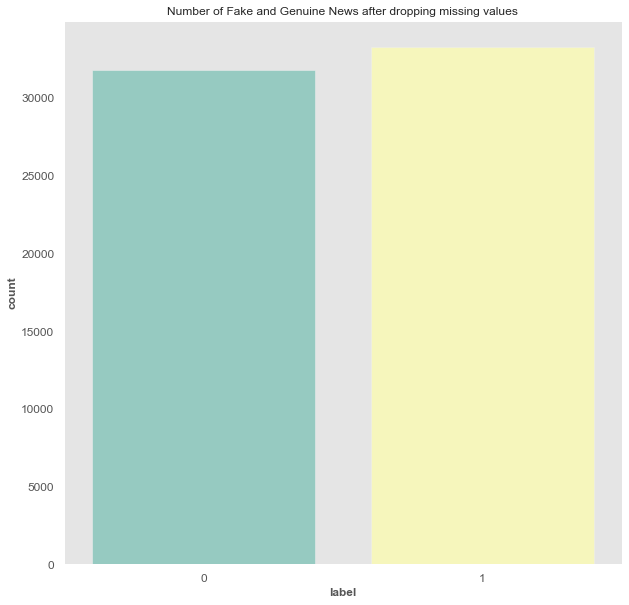

In [119]:
sns.countplot(x='label', data=data, palette='Set3')
plt.title("Number of Fake and Genuine News after dropping missing values")
plt.show()

C:\Users\WINDER~1\AppData\Local\Temp/ipykernel_12364/1471151438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['raw_text_length'] = data['text'].apply(lambda x: len(x))


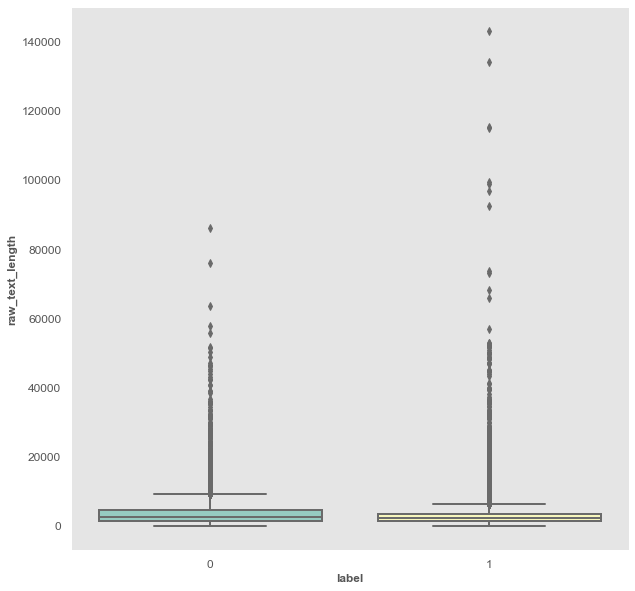

In [121]:
data['raw_text_length'] = data['text'].apply(lambda x: len(x))
sns.boxplot(y='raw_text_length', x='label', data=data, palette="Set3")
plt.show()

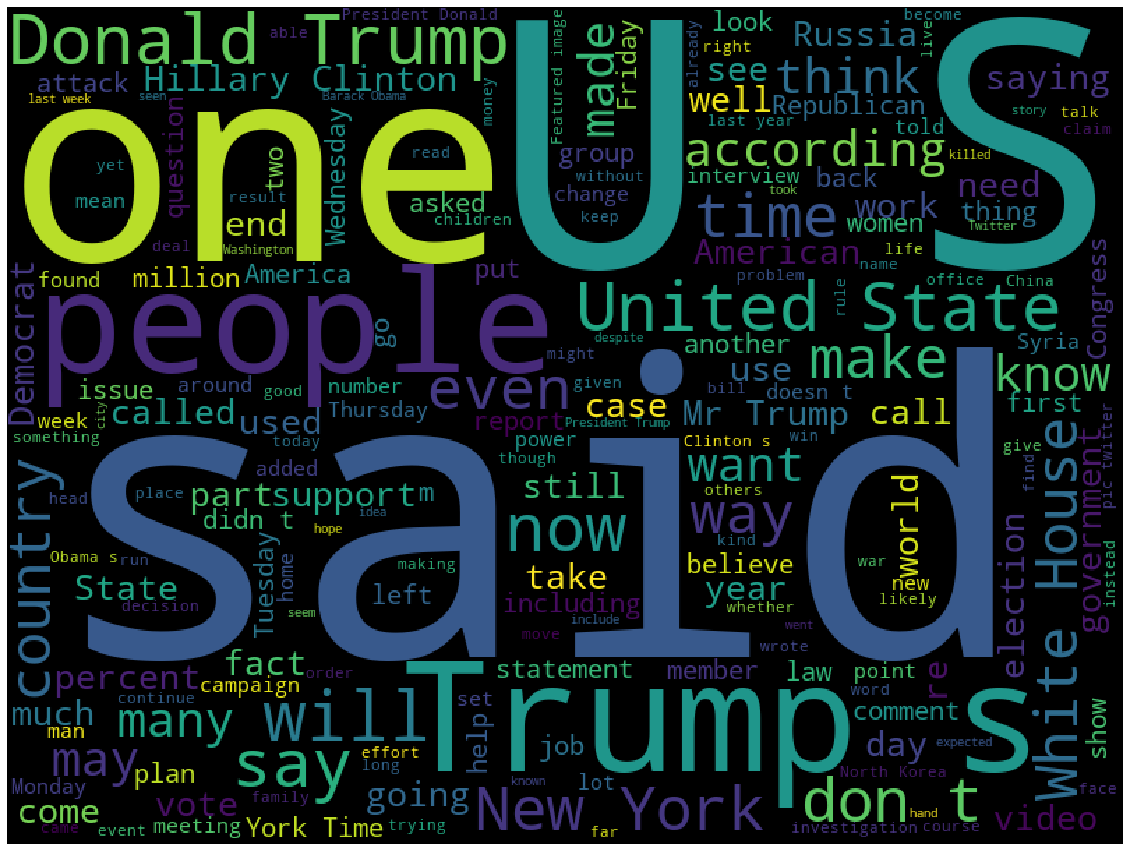

In [123]:
from wordcloud import WordCloud, STOPWORDS

# initialize the word cloud
wordcloud = WordCloud(background_color='black', width=800, height=600)
# generate the word cloud
text_cloud = wordcloud.generate(" ".join(data['comb']))
# plotting the word cloud
plt.figure(figsize=(20,30))
plt.imshow(text_cloud)
plt.axis('off')
plt.show()

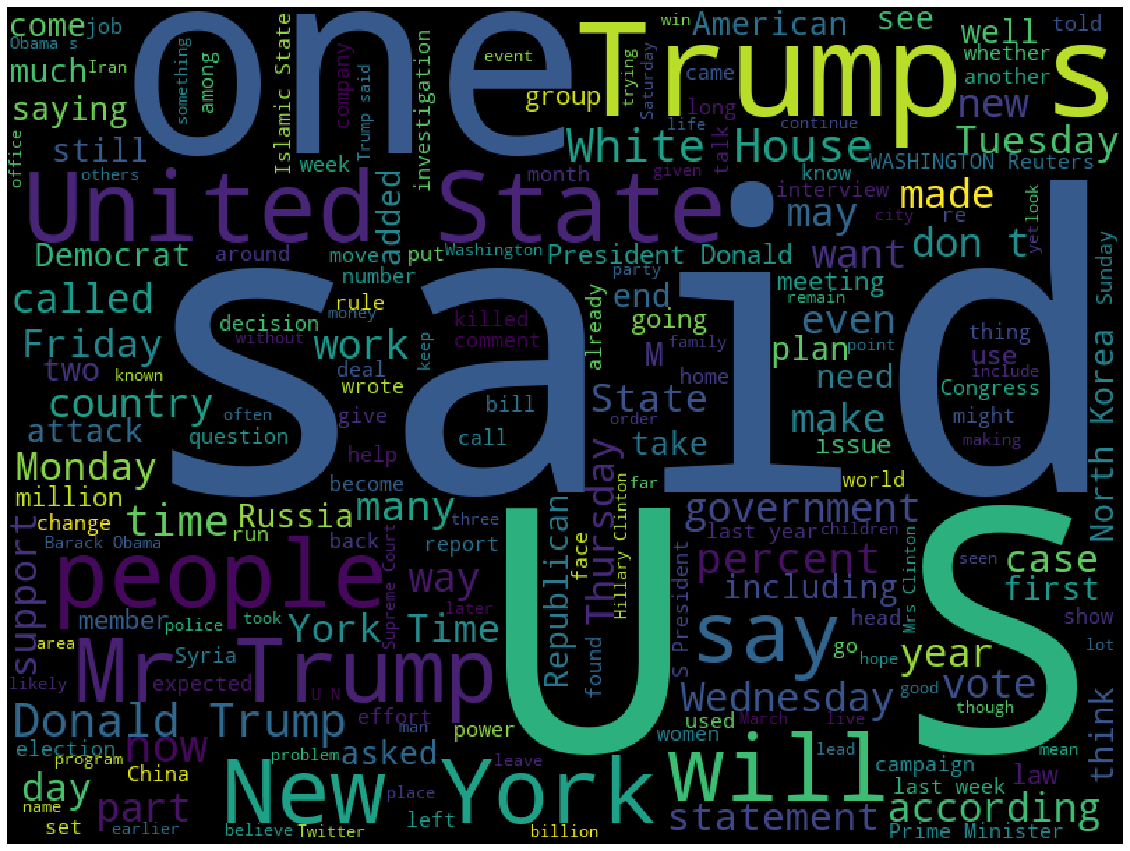

In [125]:
# reliable news (0)
reliable_news = " ".join(data[data['label']==0]['comb'])
wc = wordcloud.generate(reliable_news)
plt.figure(figsize=(20,30))
plt.imshow(wc)
plt.axis('off')
plt.show()

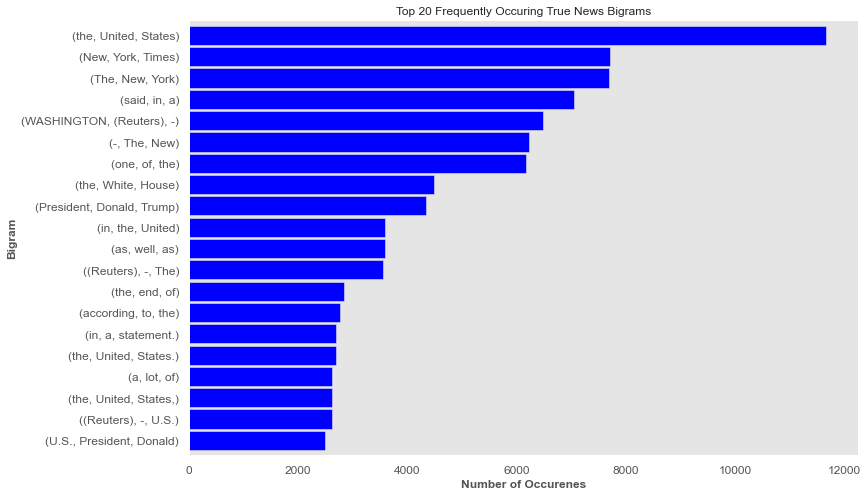

In [127]:
# Trigram
def plot_top_ngrams(corpus, title, ylabel, xlabel="Number of Occurenes", n =2):
    true_b = (pd.Series(nltk.ngrams(corpus.split(), n)).value_counts())[:20]
    true_b.sort_values().plot.barh(color='blue', width=.9, figsize=(12,8))
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.show()
plot_top_ngrams(reliable_news, "Top 20 Frequently Occuring True News Bigrams", "Bigram", n=3)

# Onehot Representation

In [ ]:
messages_text=X.copy()

In [ ]:
messages_text['title'][1]

In [ ]:
messages_text.reset_index(inplace=True)

In [ ]:
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
### Dataset Preprocessing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages_text)):
    print(i)
    review = re.sub('[^a-zA-Z]', ' ', messages_text['title'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
### Vocabulary size
voc_size=5000

In [ ]:
onehot_representation=[one_hot(words,voc_size)for words in corpus] 
onehot_representation

# Embedding Representation

In [ ]:
s_length=20
emb_docs=pad_sequences(onehot_representation,padding='pre',maxlen=s_length)
print(emb_docs)

In [ ]:
emb_docs[0]

# LSTM Model

In [40]:
from tensorflow.keras.layers import Dropout
## Creating model
embedding_vector_features=40
model_lstm=Sequential()
model_lstm.add(Embedding(voc_size,embedding_vector_features,input_length=s_length))
model_lstm.add(Dropout(0.3))
model_lstm.add(LSTM(100))
model_lstm.add(Dropout(0.3))
model_lstm.add(Dense(1,activation='sigmoid'))
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model_lstm.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 20, 40)            200000    
                                                                 
 dropout_2 (Dropout)         (None, 20, 40)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 256,501
Trainable params: 256,501
Non-trainable params: 0
_________________________________________________________________
None


In [41]:
len(emb_docs),y.shape

(65101, (65101,))

In [42]:
import numpy as np
X_final=np.array(emb_docs)
y_final=np.array(y)

In [43]:
X_final.shape,y_final.shape

((65101, 20), (65101,))

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

# Model Training

In [45]:
### Finally Training
model_lstm.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64)

Epoch 1/100
682/682 [==============================] - 24s 31ms/step - loss: 0.2922 - accuracy: 0.8722 - val_loss: 0.2099 - val_accuracy: 0.9143
Epoch 2/100
682/682 [==============================] - 20s 29ms/step - loss: 0.1892 - accuracy: 0.9254 - val_loss: 0.2178 - val_accuracy: 0.9084
Epoch 3/100
682/682 [==============================] - 20s 29ms/step - loss: 0.1599 - accuracy: 0.9372 - val_loss: 0.2035 - val_accuracy: 0.9178
Epoch 4/100
682/682 [==============================] - 20s 29ms/step - loss: 0.1385 - accuracy: 0.9467 - val_loss: 0.2018 - val_accuracy: 0.9190
Epoch 5/100
682/682 [==============================] - 20s 30ms/step - loss: 0.1217 - accuracy: 0.9535 - val_loss: 0.2118 - val_accuracy: 0.9178
Epoch 6/100
682/682 [==============================] - 21s 30ms/step - loss: 0.1072 - accuracy: 0.9598 - val_loss: 0.2276 - val_accuracy: 0.9167
Epoch 7/100
682/682 [==============================] - 21s 30ms/step - loss: 0.0950 - accuracy: 0.9647 - val_loss: 0.2527 - val_ac

# Performance Metrics And Accuracy

In [46]:
y_pred=model_lstm.predict(X_test)

In [47]:
from sklearn.metrics import confusion_matrix

In [48]:
threshold = 0.5
y_pred=np.where(y_pred > threshold, 1,0)

In [49]:
confusion_matrix(y_test,y_pred)

array([[ 9436,   929],
       [  970, 10149]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9116086389871533